**Problem Statement:**

Cardiovascular disease is one of the major diseases that threaten human life. According to reports by the world health organization, cardiovascular diseases (CVDs) mortality ranks rst in all causes of death today. Over 17.7 million people died from CVDs, which is an about 31 percentages of all deaths. More than 75 percentages of these deaths occurred in developing countries. What's more, the prevalence and mortality of cardiovascular disease (CVD) are still growing. Therefore, regular monitoring of heart rhythm has become an increasingly important and necessary matter so as to manage and prevent the CVDs.
Arrhythmia is an important group of diseases in cardiovascular disease. Arrhythmia can occur on its own or with other cardiovascular diseases. The diagnosis of arrhythmia mainly
depends on the ECG (electrocardiogram). ECG is an important modern medical tool that records the process of cardiac excitability, transmission, and recovery.
Automatic detection of irregular heart rhythms from ECG signals is a signicant task for the automatic diagnosis of cardiovascular disease.

This Hackethon is focoused on finding disease frm ECG signal. Multiclass classification problem.  
Data:
The data contain train and test CSV files. Input for your model is D1-D45 feature column. Target column is Output column which have five classes (Normal, L-BBB, PAC, PVC, R-BBB).

Submission- 

You need to submit <enrollmentno>_test.csv and , <EnrollmentNo>_minihackethonP2.ipynb in the google form:

https://forms.gle/wnHpvWHfdT7pjoyx7

Hint- Deep learning algoritm can give better performance compare to other ML algotithm.


In [68]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
%matplotlib inline

In [69]:
data=pd.read_csv("train_HD.csv")
data.head(10)

,Unnamed: 0,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,D40,D41,D42,D43,D44,D45,Output
0,11797,-0.034096,-0.014914,-0.015040,-0.018920,-0.017502,-0.014428,0.009829,0.038411,0.042260,0.037107,0.018502,-0.003184,0.002027,0.023256,0.019372,0.027796,0.094964,0.199084,0.355566,0.534858,0.753499,0.958938,1.110226,1.201315,1.143837,1.014279,0.777787,0.511467,0.357569,0.247990,0.220556,0.229680,0.200028,0.166583,0.120088,0.071488,0.060433,0.061577,0.047531,0.031596,0.016703,0.002439,-0.006174,-0.012115,-0.019979,PAC
1,4201,4.857560,4.880137,4.916961,4.974638,5.038659,5.090815,5.132529,5.160058,5.166773,5.156407,5.128603,5.019825,4.895693,4.800402,4.733530,4.768699,4.854529,4.965146,5.093065,5.227539,5.350559,5.460435,5.541063,5.518236,5.446274,5.342037,5.217550,5.121714,5.032857,4.937668,4.845875,4.761030,4.686927,4.624523,4.577414,4.561128,4.564484,4.586143,4.618658,4.660695,4.704760,4.732884,4.752616,4.762815,4.766419,L-BBB
2,21939,3.756500,3.793883,3.852013,3.902286,3.948490,4.002695,4.047276,4.048563,4.033842,3.968714,3.904655,3.896136,3.931611,4.062077,4.245712,4.472800,4.723657,4.968179,5.201395,5.420957,5.608781,5.732193,5.798890,5.788615,5.717541,5.584144,5.404767,5.181798,4.933375,4.684881,4.437075,4.200342,3.980847,3.779499,3.604704,3.486489,3.406387,3.357786,3.336749,3.341026,3.362622,3.398170,3.437357,3.474614,3.504485,R-BBB
3,2723,4.902120,4.903109,4.913205,4.964430,5.031317,5.104395,5.178331,5.229065,5.263614,5.301689,5.329262,5.299676,5.256323,5.203401,5.159992,5.200657,5.277572,5.374552,5.482244,5.580590,5.663642,5.738256,5.788660,5.756626,5.686015,5.585855,5.467547,5.387607,5.313067,5.215496,5.112739,4.991334,4.871068,4.782571,4.713830,4.669895,4.645718,4.636056,4.638873,4.663467,4.695757,4.720620,4.741977,4.743932,4.737944,L-BBB
4,7794,-0.002379,-0.004253,-0.002959,-0.010759,-0.019479,-0.018076,-0.013602,-0.006035,0.003339,0.001487,-0.002492,0.006066,0.019956,0.028742,0.050808,0.056820,0.085986,0.213661,0.390513,0.620986,0.851133,1.009449,1.111481,1.160336,1.156741,1.105569,0.999577,0.731834,0.413483,0.160714,-0.024608,-0.027958,0.033405,0.010731,-0.032894,-0.054595,-0.062989,-0.059559,-0.049309,-0.069575,-0.098113,-0.106672,-0.110650,-0.110980,-0.109294,Normal
5,12788,-0.014292,-0.012636,-0.011414,-0.008860,0.003282,0.017611,0.029641,0.039663,0.039076,0.034322,0.030004,0.026766,0.022865,0.022462,0.033349,0.056436,0.078155,0.115010,0.190490,0.290374,0.436060,0.589227,0.760216,0.897663,0.948671,0.926568,0.711977,0.423704,0.105001,-0.205261,-0.367888,-0.455338,-0.451648,-0.399006,-0.336880,-0.268630,-0.242512,-0.231898,-0.242920,-0.260253,-0.260871,-0.254830,-0.222705,-0.184628,-0.159401,PAC
6,7101,-0.125386,-0.134505,-0.134946,-0.132072,-0.124398,-0.114909,-0.118239,-0.123719,-0.109127,-0.085808,-0.086769,-0.079755,-0.050483,0.012832,0.130678,0.306678,0.547908,0.874037,1.265068,1.710509,2.196199,2.686110,3.115980,3.440777,3.571967,3.519184,3.168496,2.529786,1.890321,1.251125,0.610263,-0.028438,-0.642050,-0.394369,-0.051105,0.207509,0.328143,0.295457,0.191575,0.077400,-0.037035,-0.095590,-0.110419,-0.096287,-0.072789,Normal
7,2595,4.724333,4.748336,4.793094,4.867198,4.949698,5.047514,5.136915,5.161737,5.154611,5.105540,5.039812,4.980705,4.936105,4.915560,4.924379,5.008579,5.128052,5.285414,5.451104,5.576810,5.670684,5.727706,5.747362,5.688346,5.588458,5.473660,5.343009,5.228157,5.112135,4.978140,4.843337,4.688638,4.540275,4.453229,4.396730,4.366039,4.356576,4.343801,4.340114,4.364708,4.399685,4.445520,4.492287,4.507039,4.507225,L-BBB
8,11832,-0.025501,-0.023365,-0.018690,-0.015503,-0.012646,-0.014723,-0.017324,-0.018920,-0.020675,-0.008684,0.004110,0.001133,-0.013379,-0.032646,-0.054390,-0.127095,-0.195361,-0.218636,-0.199877,-0.069250,0.105242,0.345506,0.571171,0.712165,0.783482,0.579666,0.285049,0.042937,-0.167315,-0.214797,-0.191484,-0.111145,-0.007237,0.033689,0.053569,0.026937,-0.016371,-0.019520,-0.013549,-0.002

In [70]:
data.describe()

,Unnamed: 0,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,D40,D41,D42,D43,D44,D45
count,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000,20004.000000
mean,12515.224655,1.915331,1.926955,1.942078,1.957586,1.974307,1.991972,2.010638,2.028375,2.046702,2.064627,2.084694,2.109158,2.137786,2.175694,2.223779,2.289254,2.372504,2.469292,2.580757,2.706126,2.837076,2.969342,3.080922,3.154269,3.172281,3.102125,2.949268,2.713473,2.447410,2.206225,2.003807,1.867372,1.780440,1.724875,1.686394,1.655574,1.629514,1.606287,1.585862,1.572205,1.563913,1.562189,1.565119,1.568794,1.573018
std,7223.529462,2.278532,2.280752,2.285944,2.290583,2.295624,2.300775,2.306149,2.310304,2.316370,2.323822,2.335828,2.352306,2.376777,2.413565,2.458066,2.510835,2.562888,2.605574,2.639964,2.664965,2.679580,2.692783,2.700279,2.700721,2.695492,2.670474,2.647136,2.611214,2.574912,2.552068,2.526653,2.502079,2.467546,2.405097,2.339457,2.282307,2.234838,2.197990,2.171524,2.157867,2.151959,2.151990,2.154230,2.153363,2.151204
min,0.000000,-0.842616,-0.873514,-1.047249,-1.150102,-1.196197,-1.179792,-1.131737,-1.073222,-1.047705,-1.182003,-1.357731,-1.505952,-1.580234,-1.667386,-1.948648,-2.112952,-2.215608,-2.354288,-2.640290,-2.781560,-2.931349,-3.035094,-3.094493,-3.127985,-3.141235,-3.142820,-3.123739,-3.094620,-3.038584,-2.937908,-2.753236,-2.668677,-2.587070,-2.502298,-2.440546,-2.511189,-2.586935,-2.644865,-2.660758,-2.656813,-2.680730,-2.705141,-2.712468,-2.708084,-2.690015
25%,6249.500000,-0.009021,-0.007989,-0.006855,-0.005171,-0.004881,-0.003748,-0.002880,-0.001577,-0.000818,-0.000182,0.000875,0.001986,0.007880,0.017716,0.023300,0.041887,0.088035,0.172455,0.319996,0.497152,0.709956,0.929361,1.117733,1.230322,1.221725,1.071029,0.799796,0.485622,0.207653,-0.045384,-0.161312,-0.212531,-0.303999,-0.263131,-0.194624,-0.145235,-0.132037,-0.124333,-0.121658,-0.127515,-0.134082,-0.141443,-0.146180,-0.147074,-0.143921
50%,12528.500000,0.135940,0.157911,0.179520,0.205197,0.238486,0.278510,0.324664,0.374215,0.427166,0.485832,0.545663,0.600691,0.644227,0.714491,0.808405,0.904186,1.028031,1.196933,1.382192,1.572831,1.800220,2.010164,2.164986,2.253132,2.291401,2.234956,2.065960,1.778488,1.527158,1.200708,0.867678,0.529538,0.334393,0.186773,0.118342,0.108054,0.148120,0.158427,0.108094,0.051419,0.005581,-0.018839,-0.031124,-0.035100,-0.036724
75%,18783.250000,4.641423,4.657453,4.679782,4.700358,4.714448,4.721998,4.728770,4.715663,4.694983,4.675294,4.674300,4.687502,4.728584,4.794331,4.885074,4.985253,5.095439,5.186705,5.290864,5.428329,5.590802,5.765326,5.887056,5.931358,5.942090,5.868670,5.699471,5.404714,5.091941,4.818568,4.648340,4.615233,4.604751,4.537208,4.458816,4.395971,4.343560,4.298228,4.238657,4.191904,4.153042,4.136502,4.130221,4.130994,4.135152
max,25005.000000,7.689507,7.685897,7.682751,7.678123,7.672934,7.678387,7.683369,7.680763,7.671668,7.639682,7.592495,7.561199,7.508154,7.442311,7.357067,7.554378,7.751856,7.934109,8.093545,8.181208,8.228251,8.246704,8.239271,8.223502,8.190681,8.143401,8.082906,7.982169,7.859039,7.777374,7.680551,7.545081,7.362002,7.060690,6.669574,6.418264,6.313290,6.190084,6.224201,6.278377,6.333337,6.378610,6.417126,6.414050,6.394608


In [71]:
data['Output'].unique()

array(['PAC', 'L-BBB', 'R-BBB', 'Normal', 'PVC'], dtype=object)

In [72]:
data.shape

(20004, 47)

In [73]:
X= data.drop('Output',axis=1)
y= data['Output']


In [74]:
np.unique(y)

array(['L-BBB', 'Normal', 'PAC', 'PVC', 'R-BBB'], dtype=object)

In [25]:
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [75]:
labelencoder = LabelEncoder()
y= labelencoder.fit_transform(y)
np.unique(y)




array([0, 1, 2, 3, 4])

In [77]:
for i in range(10):
  print(y[i])

2
0
4
0
1
2
1
0
2
0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=0)

X_train.shape, y_train.shape, X_test.shape , y_test.shape

((16003, 46), (16003,), (4001, 46), (4001,))

In [29]:
results_test = {}
results_train = {}
list_algos=[]

In [18]:
def prdict_date(algo_name,X_train,y_train,X_test,y_test,atype='',verbose=0):
    algo_name.fit(X_train, y_train)
    Y_pred = algo_name.predict(X_test)
    acc_train = round(algo_name.score(X_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(X_test, y_test) * 100, 2)
    
    results_test[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_train
    list_algos.append(str(algo_name)[0:str(algo_name).find('(')])
    if verbose ==0:
        print("acc train: " + str(acc_train))
        print("acc test: "+ str(acc_val))
    else:
        return Y_pred

In [30]:
### LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
prdict_date(lda,X_train,y_train,X_test,y_test)

acc train: 98.13
acc test: 98.35


In [33]:
# Train: Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=50, random_state = 0)
prdict_date(random_forest,X_train,y_train,X_test,y_test)

acc train: 100.0
acc test: 99.98


In [35]:
### DECISION TREE

dect =DecisionTreeClassifier()

prdict_date(dect,X_train,y_train,X_test,y_test)

acc train: 100.0
acc test: 99.98


In [39]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 6)
prdict_date(knn,X_train,y_train,X_test,y_test)

acc train: 99.75
acc test: 99.78


In [42]:
### SVM 
from sklearn import svm

svm = svm.SVC(kernel='linear', probability=True)
prdict_date(svm,X_train,y_train,X_test,y_test,'linear') 

acc train: 99.36
acc test: 99.35


In [47]:
#  SVM with kernel = polynomial
from sklearn.svm import SVC
svm = SVC(kernel='poly', probability=True)
prdict_date(svm,X_train,y_train,X_test,y_test,'poly')

acc train: 99.32
acc test: 99.35


In [50]:
#  SVM
svm = SVC(kernel='rbf', probability=True)
prdict_date(svm,X_train,y_train,X_test,y_test,'rbf')

acc train: 98.99
acc test: 98.75


**TRAINING AND TESTING ACCURACY IN THE TABLE FORMAT IN DESCENDING ORDER**

In [51]:
# print (results_test)

df_test =pd.DataFrame(list(results_test.items()),
                      columns=['algo_name','acc_test'])
df_train =pd.DataFrame(list(results_train.items()),
                      columns=['algo_name','acc_train'])
df_results = df_test.join(df_train.set_index('algo_name'), on='algo_name')
df_results.sort_values('acc_test',ascending=False)

,algo_name,acc_test,acc_train
1,RandomForestClassifier_,99.98,100.00
2,DecisionTreeClassifier_,99.98,100.00
3,KNeighborsClassifier_,99.78,99.75
4,SVC_linear,99.35,99.36
5,SVC_poly,99.35,99.32
6,SVC_rbf,98.75,98.99
0,LinearDiscriminantAnalysis_,98.35,98.13


GRAPHICALLY REPRESENTING TRAINING AND TESTING ACCURACY OF ALL THE METHODS 


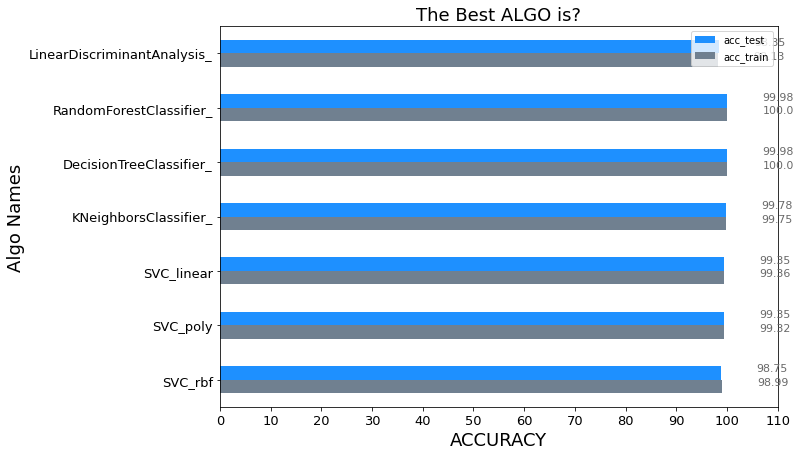

In [54]:
pd.set_option('display.max_row', 100)

# set jupyter's max column width to 50
pd.set_option('display.max_columns', 50)

# Load the dataset
ax = df_results[['acc_test', 'acc_train']].plot(kind='barh',
              figsize=(10,7), color=['dodgerblue', 'slategray'], fontsize=13);
ax.set_alpha(0.8)
ax.set_title("The Best ALGO is?",
fontsize=18)
ax.set_xlabel("ACCURACY", fontsize=18)
ax.set_ylabel("Algo Names", fontsize=18)
ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100,110])
ax.set_yticklabels(df_results.iloc[:,0].values.tolist())

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+7, i.get_y()+.1, \
            str(round((i.get_width()), 2)), fontsize=11, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

AS YOU CAN SEE ACCURACY OF RANDOM FOREST IS MAXIMUM WITH THE TRAINING ACCURACY OF 100% AND TESTING ACCURACY OF 99.98%. SO TESTING DATA WILL BE PREDICTED ON RANDOM FOREST METHOD

In [111]:
data2= pd.read_csv("test_HD.csv")
data2.head(10)

,Unnamed: 0,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,D40,D41,D42,D43,D44,D45,Output
0,20820,4.224987,4.232538,4.240808,4.238645,4.233035,4.234596,4.236301,4.235138,4.236383,4.216350,4.201778,4.224256,4.275954,4.362409,4.471281,4.647990,4.835895,4.978416,5.097676,5.109660,5.096580,5.126294,5.167333,5.355326,5.542437,5.641214,5.645925,5.346116,4.918548,4.384663,3.831546,3.465525,3.193233,3.071127,3.030431,2.985631,2.960461,2.935407,2.917709,2.907231,2.903411,2.907256,2.914112,2.931867,2.951018,NaN
1,22605,4.254722,4.352178,4.490120,4.594258,4.670159,4.691184,4.669733,4.532316,4.366877,4.189506,4.047061,4.081440,4.209659,4.457443,4.766960,5.053613,5.335002,5.603548,5.847826,6.046650,6.201739,6.306102,6.363488,6.350551,6.287497,6.207954,6.098434,5.936039,5.742297,5.534292,5.312279,5.083673,4.854499,4.615695,4.389282,4.192074,4.028255,3.928583,3.871683,3.869308,3.897522,3.930563,3.967369,3.997832,4.020858,NaN
2,6695,-0.192255,-0.199298,-0.208130,-0.216373,-0.212773,-0.204301,-0.194336,-0.184034,-0.174320,-0.163928,-0.168329,-0.170025,-0.158695,-0.122519,-0.073063,0.032553,0.192206,0.394956,0.662416,0.968963,1.303635,1.682470,2.040807,2.348440,2.507722,2.481688,2.129861,1.527799,0.879601,0.232667,-0.379870,-0.759027,-0.714239,-0.500146,-0.263485,-0.058937,0.038370,0.048414,0.015681,-0.049249,-0.094584,-0.134719,-0.140550,-0.133366,-0.126651,NaN
3,5049,0.035920,0.018036,0.000215,0.016145,0.041597,0.084997,0.134930,0.127601,0.116853,0.129522,0.188484,0.286819,0.406973,0.524320,0.661769,0.830794,1.031012,1.223550,1.405125,1.539164,1.640208,1.771808,1.917840,2.083644,2.181647,2.171198,2.059748,1.755315,1.325121,0.926566,0.607674,0.403026,0.249600,0.127312,0.046072,0.022583,0.026398,-0.001326,-0.030968,-0.071667,-0.114267,-0.108585,-0.089603,-0.109489,-0.137520,NaN
4,5219,0.001902,0.006177,0.013342,0.022948,0.033037,0.045847,0.062045,0.083441,0.110291,0.142104,0.192168,0.254428,0.292611,0.333133,0.429032,0.546549,0.659762,0.780265,0.892495,1.011547,1.160101,1.314638,1.518066,1.700341,1.832361,1.886500,1.746814,1.509690,1.085083,0.611561,0.306284,0.079472,-0.016166,-0.039675,-0.043710,-0.024436,-0.021351,-0.020934,-0.006078,0.009885,-0.007755,-0.034478,-0.052547,-0.068276,-0.061123,NaN
5,8068,-0.028852,-0.018534,-0.005472,0.010102,0.012414,0.014573,0.030729,0.055284,0.086099,0.126575,0.179466,0.246102,0.325014,0.420084,0.538556,0.674643,0.838185,1.012467,1.184708,1.361435,1.507741,1.640815,1.837538,2.014812,2.149842,2.203057,2.041163,1.764178,1.292940,0.773208,0.469150,0.261445,0.132642,0.061926,0.015597,-0.006933,-0.014787,-0.015716,-0.025870,-0.039044,-0.058792,-0.079517,-0.097237,-0.114169,-0.113292,NaN
6,22640,4.477948,4.569542,4.635568,4.671842,4.673858,4.583987,4.463798,4.302982,4.159547,4.121163,4.156588,4.344412,4.608133,4.899908,5.211001,5.482432,5.731717,5.974871,6.192897,6.353415,6.468410,6.550936,6.591758,6.566140,6.489869,6.384734,6.244038,6.039954,5.800344,5.554807,5.297477,5.032547,4.772401,4.491474,4.227836,4.042875,3.909731,3.841552,3.817721,3.833896,3.874457,3.914586,3.954689,3.988993,4.014129,NaN
7,20164,3.843521,3.849760,3.852515,3.846957,3.834274,3.812870,3.789116,3.743869,3.705798,3.691376,3.702821,3.796011,3.918882,4.071558,4.226497,4.288599,4.327490,4.327778,4.338187,4.459989,4.623752,4.912989,5.201241,5.387626,5.473170,5.288084,4.973746,4.515002,4.013581,3.654567,3.364934,3.222908,3.153112,3.078096,3.021039,2.942009,2.866661,2.831574,2.815572,2.804182,2.799665,2.809731,2.825017,2.825534,2.822066,NaN
8,5568,0.097247,0.086396,0.065381,0.043761,0.055456,0.077198,0.080124,0.078828,0.072500,0.065837,0.081807,0.103099,0.105193,0.112505,0.106874,0.119268,0.193060,0.305488,0.513840,0.754642,0.969378,1.159992,1.309873,1.407220,1.432026,1.388483,1.228702,1.007750,0.712736,0.403851,0.156406,-0.044794,-0.109021,-0.111609,-0.099016,-0.070020,-0.076787,-0.090780,-0.098121,-0.105643,-0.107147,-0.106182,-0.105813,-0.105550,-0

In [112]:
X1= data.drop('Output',axis=1)

In [113]:
X1=scaler.fit_transform(X1)

In [114]:
X1

array([[0.47178564, 0.09476186, 0.10031062, ..., 0.29643087, 0.29554154,
        0.29390724],
       [0.1680064 , 0.6680841 , 0.67220178, ..., 0.81767982, 0.81898594,
        0.82077534],
       [0.87738452, 0.53903539, 0.54529417, ..., 0.67361435, 0.67776883,
        0.68186645],
       ...,
       [0.5810038 , 0.11104859, 0.11702946, ..., 0.2291156 , 0.23358129,
        0.23685841],
       [0.03595281, 0.65831341, 0.65941833, ..., 0.74962654, 0.74966855,
        0.75094543],
       [0.50813837, 0.09725442, 0.10042857, ..., 0.267006  , 0.26687943,
        0.26880418]])

In [115]:
y1= random_forest.predict(X1)

In [116]:
np.unique(y1)

array([0, 1, 2, 3, 4])

In [117]:
data2["Output"]=pd.DataFrame(y1)

In [118]:
data2.head(20)

,Unnamed: 0,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,D40,D41,D42,D43,D44,D45,Output
0,20820,4.224987,4.232538,4.240808,4.238645,4.233035,4.234596,4.236301,4.235138,4.236383,4.216350,4.201778,4.224256,4.275954,4.362409,4.471281,4.647990,4.835895,4.978416,5.097676,5.109660,5.096580,5.126294,5.167333,5.355326,5.542437,5.641214,5.645925,5.346116,4.918548,4.384663,3.831546,3.465525,3.193233,3.071127,3.030431,2.985631,2.960461,2.935407,2.917709,2.907231,2.903411,2.907256,2.914112,2.931867,2.951018,2
1,22605,4.254722,4.352178,4.490120,4.594258,4.670159,4.691184,4.669733,4.532316,4.366877,4.189506,4.047061,4.081440,4.209659,4.457443,4.766960,5.053613,5.335002,5.603548,5.847826,6.046650,6.201739,6.306102,6.363488,6.350551,6.287497,6.207954,6.098434,5.936039,5.742297,5.534292,5.312279,5.083673,4.854499,4.615695,4.389282,4.192074,4.028255,3.928583,3.871683,3.869308,3.897522,3.930563,3.967369,3.997832,4.020858,0
2,6695,-0.192255,-0.199298,-0.208130,-0.216373,-0.212773,-0.204301,-0.194336,-0.184034,-0.174320,-0.163928,-0.168329,-0.170025,-0.158695,-0.122519,-0.073063,0.032553,0.192206,0.394956,0.662416,0.968963,1.303635,1.682470,2.040807,2.348440,2.507722,2.481688,2.129861,1.527799,0.879601,0.232667,-0.379870,-0.759027,-0.714239,-0.500146,-0.263485,-0.058937,0.038370,0.048414,0.015681,-0.049249,-0.094584,-0.134719,-0.140550,-0.133366,-0.126651,4
3,5049,0.035920,0.018036,0.000215,0.016145,0.041597,0.084997,0.134930,0.127601,0.116853,0.129522,0.188484,0.286819,0.406973,0.524320,0.661769,0.830794,1.031012,1.223550,1.405125,1.539164,1.640208,1.771808,1.917840,2.083644,2.181647,2.171198,2.059748,1.755315,1.325121,0.926566,0.607674,0.403026,0.249600,0.127312,0.046072,0.022583,0.026398,-0.001326,-0.030968,-0.071667,-0.114267,-0.108585,-0.089603,-0.109489,-0.137520,0
4,5219,0.001902,0.006177,0.013342,0.022948,0.033037,0.045847,0.062045,0.083441,0.110291,0.142104,0.192168,0.254428,0.292611,0.333133,0.429032,0.546549,0.659762,0.780265,0.892495,1.011547,1.160101,1.314638,1.518066,1.700341,1.832361,1.886500,1.746814,1.509690,1.085083,0.611561,0.306284,0.079472,-0.016166,-0.039675,-0.043710,-0.024436,-0.021351,-0.020934,-0.006078,0.009885,-0.007755,-0.034478,-0.052547,-0.068276,-0.061123,1
5,8068,-0.028852,-0.018534,-0.005472,0.010102,0.012414,0.014573,0.030729,0.055284,0.086099,0.126575,0.179466,0.246102,0.325014,0.420084,0.538556,0.674643,0.838185,1.012467,1.184708,1.361435,1.507741,1.640815,1.837538,2.014812,2.149842,2.203057,2.041163,1.764178,1.292940,0.773208,0.469150,0.261445,0.132642,0.061926,0.015597,-0.006933,-0.014787,-0.015716,-0.025870,-0.039044,-0.058792,-0.079517,-0.097237,-0.114169,-0.113292,2
6,22640,4.477948,4.569542,4.635568,4.671842,4.673858,4.583987,4.463798,4.302982,4.159547,4.121163,4.156588,4.344412,4.608133,4.899908,5.211001,5.482432,5.731717,5.974871,6.192897,6.353415,6.468410,6.550936,6.591758,6.566140,6.489869,6.384734,6.244038,6.039954,5.800344,5.554807,5.297477,5.032547,4.772401,4.491474,4.227836,4.042875,3.909731,3.841552,3.817721,3.833896,3.874457,3.914586,3.954689,3.988993,4.014129,1
7,20164,3.843521,3.849760,3.852515,3.846957,3.834274,3.812870,3.789116,3.743869,3.705798,3.691376,3.702821,3.796011,3.918882,4.071558,4.226497,4.288599,4.327490,4.327778,4.338187,4.459989,4.623752,4.912989,5.201241,5.387626,5.473170,5.288084,4.973746,4.515002,4.013581,3.654567,3.364934,3.222908,3.153112,3.078096,3.021039,2.942009,2.866661,2.831574,2.815572,2.804182,2.799665,2.809731,2.825017,2.825534,2.822066,0
8,5568,0.097247,0.086396,0.065381,0.043761,0.055456,0.077198,0.080124,0.078828,0.072500,0.065837,0.081807,0.103099,0.105193,0.112505,0.106874,0.119268,0.193060,0.305488,0.513840,0.754642,0.969378,1.159992,1.309873,1.407220,1.432026,1.388483,1.228702,1.007750,0.712736,0.403851,0.156406,-0.044794,-0.109021,-0.111609,-0.099016,-0.070020,-0.076787,-0.090780,-0.098121,-0.105643,-0.107147,-0.106182,-0.105813,-0.105550,-0.111415,2
9,1911

In [121]:

vals_to_replace = {0:'L-BBB', 1:'Normal', 2:'PAC',3:'PVC',4:'R-BBB'}
data2['Output'] = data2['Output'].map(vals_to_replace)




In [122]:
data2.head(10)


,Unnamed: 0,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,D40,D41,D42,D43,D44,D45,Output
0,20820,4.224987,4.232538,4.240808,4.238645,4.233035,4.234596,4.236301,4.235138,4.236383,4.216350,4.201778,4.224256,4.275954,4.362409,4.471281,4.647990,4.835895,4.978416,5.097676,5.109660,5.096580,5.126294,5.167333,5.355326,5.542437,5.641214,5.645925,5.346116,4.918548,4.384663,3.831546,3.465525,3.193233,3.071127,3.030431,2.985631,2.960461,2.935407,2.917709,2.907231,2.903411,2.907256,2.914112,2.931867,2.951018,PAC
1,22605,4.254722,4.352178,4.490120,4.594258,4.670159,4.691184,4.669733,4.532316,4.366877,4.189506,4.047061,4.081440,4.209659,4.457443,4.766960,5.053613,5.335002,5.603548,5.847826,6.046650,6.201739,6.306102,6.363488,6.350551,6.287497,6.207954,6.098434,5.936039,5.742297,5.534292,5.312279,5.083673,4.854499,4.615695,4.389282,4.192074,4.028255,3.928583,3.871683,3.869308,3.897522,3.930563,3.967369,3.997832,4.020858,L-BBB
2,6695,-0.192255,-0.199298,-0.208130,-0.216373,-0.212773,-0.204301,-0.194336,-0.184034,-0.174320,-0.163928,-0.168329,-0.170025,-0.158695,-0.122519,-0.073063,0.032553,0.192206,0.394956,0.662416,0.968963,1.303635,1.682470,2.040807,2.348440,2.507722,2.481688,2.129861,1.527799,0.879601,0.232667,-0.379870,-0.759027,-0.714239,-0.500146,-0.263485,-0.058937,0.038370,0.048414,0.015681,-0.049249,-0.094584,-0.134719,-0.140550,-0.133366,-0.126651,R-BBB
3,5049,0.035920,0.018036,0.000215,0.016145,0.041597,0.084997,0.134930,0.127601,0.116853,0.129522,0.188484,0.286819,0.406973,0.524320,0.661769,0.830794,1.031012,1.223550,1.405125,1.539164,1.640208,1.771808,1.917840,2.083644,2.181647,2.171198,2.059748,1.755315,1.325121,0.926566,0.607674,0.403026,0.249600,0.127312,0.046072,0.022583,0.026398,-0.001326,-0.030968,-0.071667,-0.114267,-0.108585,-0.089603,-0.109489,-0.137520,L-BBB
4,5219,0.001902,0.006177,0.013342,0.022948,0.033037,0.045847,0.062045,0.083441,0.110291,0.142104,0.192168,0.254428,0.292611,0.333133,0.429032,0.546549,0.659762,0.780265,0.892495,1.011547,1.160101,1.314638,1.518066,1.700341,1.832361,1.886500,1.746814,1.509690,1.085083,0.611561,0.306284,0.079472,-0.016166,-0.039675,-0.043710,-0.024436,-0.021351,-0.020934,-0.006078,0.009885,-0.007755,-0.034478,-0.052547,-0.068276,-0.061123,Normal
5,8068,-0.028852,-0.018534,-0.005472,0.010102,0.012414,0.014573,0.030729,0.055284,0.086099,0.126575,0.179466,0.246102,0.325014,0.420084,0.538556,0.674643,0.838185,1.012467,1.184708,1.361435,1.507741,1.640815,1.837538,2.014812,2.149842,2.203057,2.041163,1.764178,1.292940,0.773208,0.469150,0.261445,0.132642,0.061926,0.015597,-0.006933,-0.014787,-0.015716,-0.025870,-0.039044,-0.058792,-0.079517,-0.097237,-0.114169,-0.113292,PAC
6,22640,4.477948,4.569542,4.635568,4.671842,4.673858,4.583987,4.463798,4.302982,4.159547,4.121163,4.156588,4.344412,4.608133,4.899908,5.211001,5.482432,5.731717,5.974871,6.192897,6.353415,6.468410,6.550936,6.591758,6.566140,6.489869,6.384734,6.244038,6.039954,5.800344,5.554807,5.297477,5.032547,4.772401,4.491474,4.227836,4.042875,3.909731,3.841552,3.817721,3.833896,3.874457,3.914586,3.954689,3.988993,4.014129,Normal
7,20164,3.843521,3.849760,3.852515,3.846957,3.834274,3.812870,3.789116,3.743869,3.705798,3.691376,3.702821,3.796011,3.918882,4.071558,4.226497,4.288599,4.327490,4.327778,4.338187,4.459989,4.623752,4.912989,5.201241,5.387626,5.473170,5.288084,4.973746,4.515002,4.013581,3.654567,3.364934,3.222908,3.153112,3.078096,3.021039,2.942009,2.866661,2.831574,2.815572,2.804182,2.799665,2.809731,2.825017,2.825534,2.822066,L-BBB
8,5568,0.097247,0.086396,0.065381,0.043761,0.055456,0.077198,0.080124,0.078828,0.072500,0.065837,0.081807,0.103099,0.105193,0.112505,0.106874,0.119268,0.193060,0.305488,0.513840,0.754642,0.969378,1.159992,1.309873,1.407220,1.432026,1.388483,1.228702,1.007750,0.712736,0.403851,0.156406,-0.044794,-0.109021,-0.111609,-0.099016,-0.070020,-0.076787,-0.090780,-0.098121,-0.105643,-0.107147,-0.106182,-0.10581

In [123]:
data2.to_csv("E18CSE031_test.csv")
